In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from utils import *
from HC import *
from SA import *
from ACO import *
from GA import *

plt.style.use('seaborn')

In [2]:
data = pd.read_csv('./xqf131.tsp', sep='\s+', skiprows=8, header=None)
data

,0,1,2
0,1,0.0,13.0
1,2,0.0,26.0
2,3,0.0,27.0
3,4,0.0,39.0
4,5,2.0,0.0
...,...,...,...
127,128,84.0,34.0
128,129,84.0,38.0
129,130,84.0,6.0
130,131,107.0,27.0


In [3]:
cities=data.iloc[:-1,1:3].values
distance = distance_matrix(cities)
cities

array([[  0.,  13.],
       [  0.,  26.],
       [  0.,  27.],
       [  0.,  39.],
       [  2.,   0.],
       [  5.,  13.],
       [  5.,  19.],
       [  5.,  25.],
       [  5.,  31.],
       [  5.,  37.],
       [  5.,  43.],
       [  5.,   8.],
       [  8.,   0.],
       [  9.,  10.],
       [ 10.,  10.],
       [ 11.,  10.],
       [ 12.,  10.],
       [ 12.,   5.],
       [ 15.,  13.],
       [ 15.,  19.],
       [ 15.,  25.],
       [ 15.,  31.],
       [ 15.,  37.],
       [ 15.,  43.],
       [ 15.,   8.],
       [ 18.,  11.],
       [ 18.,  13.],
       [ 18.,  15.],
       [ 18.,  17.],
       [ 18.,  19.],
       [ 18.,  21.],
       [ 18.,  23.],
       [ 18.,  25.],
       [ 18.,  27.],
       [ 18.,  29.],
       [ 18.,  31.],
       [ 18.,  33.],
       [ 18.,  35.],
       [ 18.,  37.],
       [ 18.,  39.],
       [ 18.,  41.],
       [ 18.,  42.],
       [ 18.,  44.],
       [ 18.,  45.],
       [ 25.,  11.],
       [ 25.,  15.],
       [ 25.,  22.],
       [ 25.,

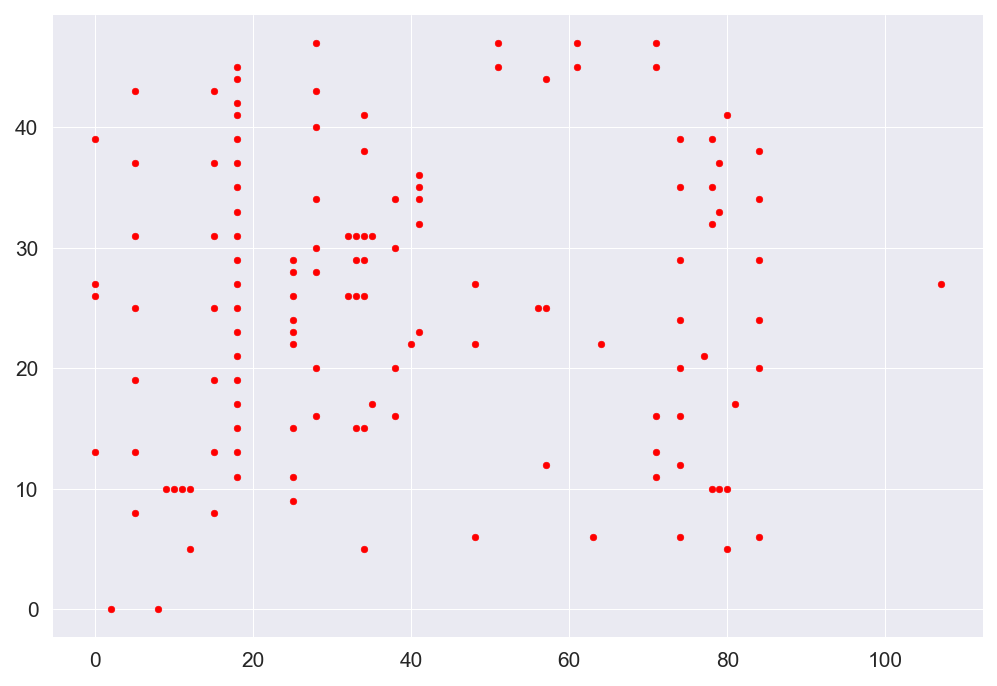

In [4]:
# plot the cities
plt.figure(dpi=150)
plt.grid(linestyle='-', linewidth=0.5)
plt.scatter(cities[:, 0], cities[:, 1], color='red', s=10)
plt.show()

最佳路径： [51, 27, 82, 49, 28, 59, 99, 98, 108, 116, 44, 74, 126, 87, 48, 68, 122, 114, 115, 118, 124, 117, 75, 76, 73, 125, 77, 55, 15, 0, 109, 71, 9, 103, 60, 79, 100, 57, 61, 94, 111, 128, 90, 16, 53, 14, 17, 20, 1, 121, 72, 18, 64, 70, 29, 5, 58, 42, 83, 7, 33, 13, 86, 80, 22, 46, 54, 21, 92, 102, 62, 23, 106, 45, 52, 11, 127, 120, 123, 30, 88, 6, 10, 3, 112, 67, 12, 97, 41, 89, 66, 24, 35, 34, 8, 43, 36, 37, 95, 105, 104, 113, 65, 130, 119, 84, 31, 63, 2, 32, 91, 4, 93, 39, 50, 129, 47, 56, 38, 81, 78, 110, 107, 85, 26, 96, 69, 19, 25, 101, 40]
最佳距离： 3948.9585196768126


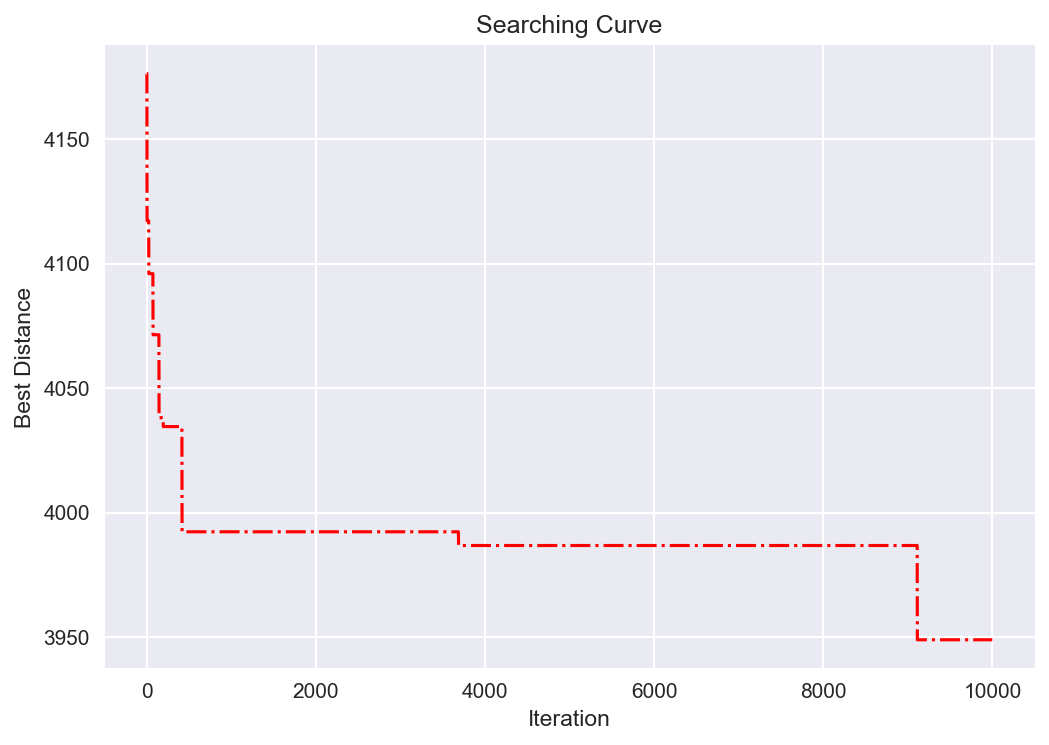

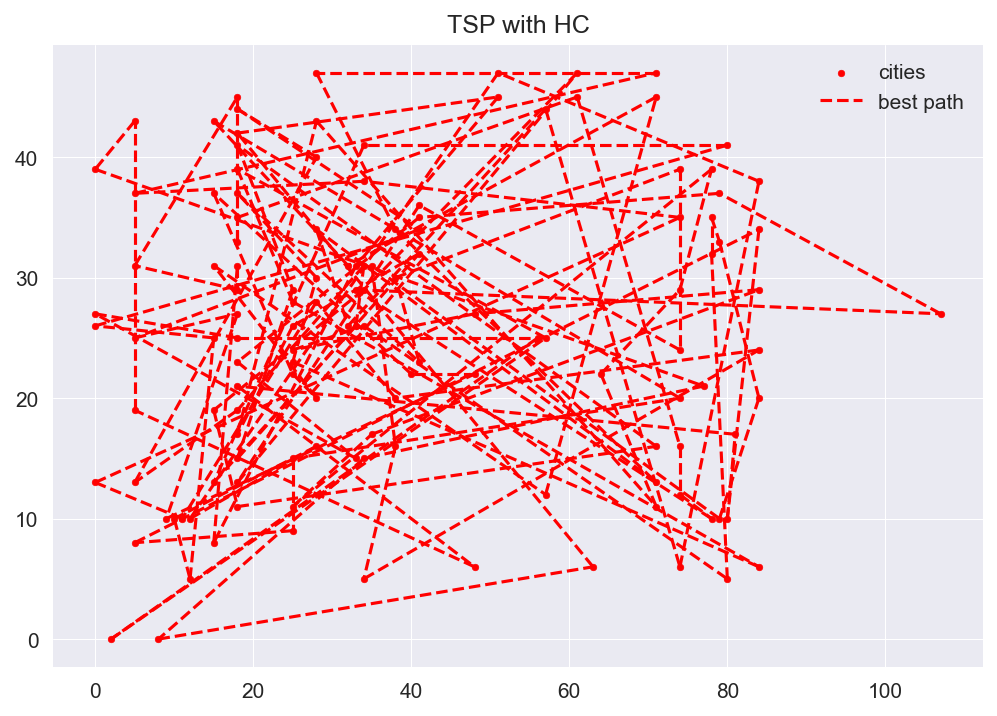

In [5]:
# 爬山算法
num_iterations = 10000

# 运行100爬山算法,每次运行给不同的随机数种子，保留最佳路径和最佳距离
all_best_distance = np.inf
for i in range(100):
    hc = HC(cities, distance, num_iterations)
    hc.set_seed(i)
    best_path, best_distance = hc.hill_climbing()
    if best_distance < all_best_distance:
        all_best_path = best_path
        all_best_distance = best_distance
        best_modelHC = hc


# 输出结果
print("最佳路径：", all_best_path)
print("最佳距离：", all_best_distance)

best_modelHC.plot_learning_curve()
plot_result(cities, all_best_path,model_name='HC', names=False, s=10)

d:\USR\Programming Practice for Scientific Problems Solving\term-project\SA.py:54: RuntimeWarning: overflow encountered in exp
  acceptance_prob = np.exp(


最佳路径： [53, 45, 17, 12, 4, 5, 28, 74, 67, 63, 97, 92, 86, 89, 90, 72, 29, 13, 14, 15, 16, 27, 47, 81, 98, 108, 109, 119, 110, 116, 115, 128, 121, 127, 125, 112, 106, 107, 114, 118, 93, 91, 87, 70, 69, 51, 50, 32, 19, 7, 3, 9, 23, 42, 43, 40, 41, 22, 10, 8, 6, 11, 0, 1, 2, 59, 60, 58, 71, 78, 85, 84, 94, 95, 103, 102, 96, 65, 46, 54, 44, 52, 25, 24, 18, 26, 73, 88, 122, 129, 111, 99, 100, 126, 130, 124, 120, 123, 105, 117, 113, 104, 101, 83, 82, 77, 76, 80, 64, 61, 55, 62, 56, 49, 48, 30, 31, 20, 36, 39, 38, 34, 21, 33, 35, 37, 57, 66, 79, 75, 68]
最佳距离： 1140.6368725910975


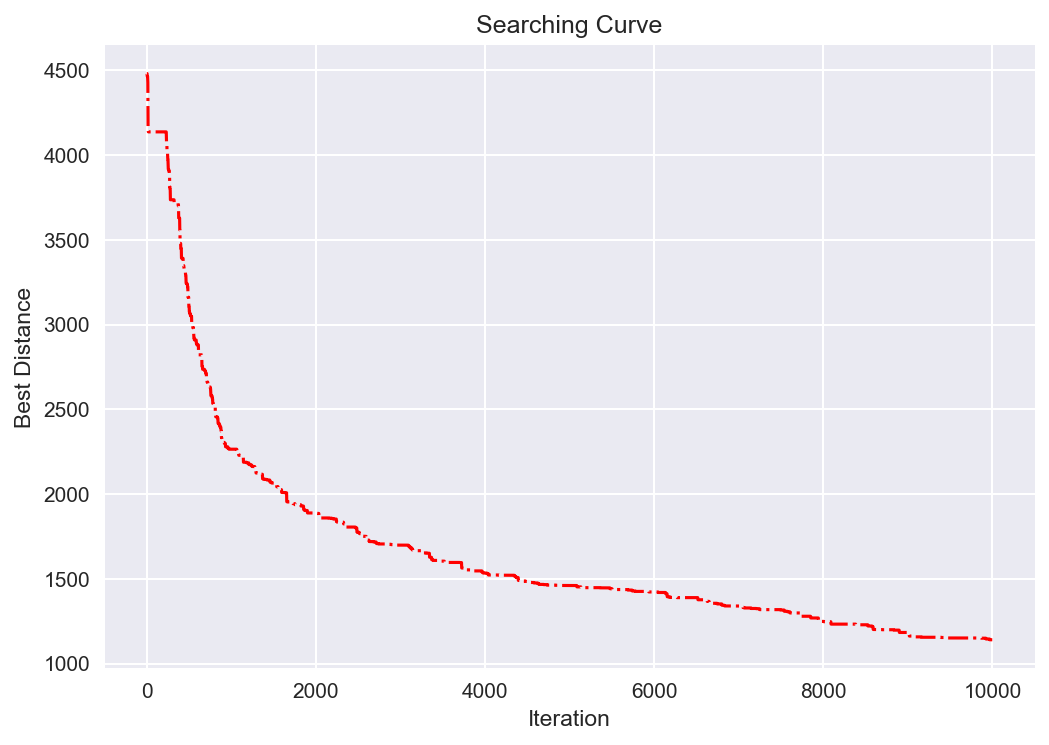

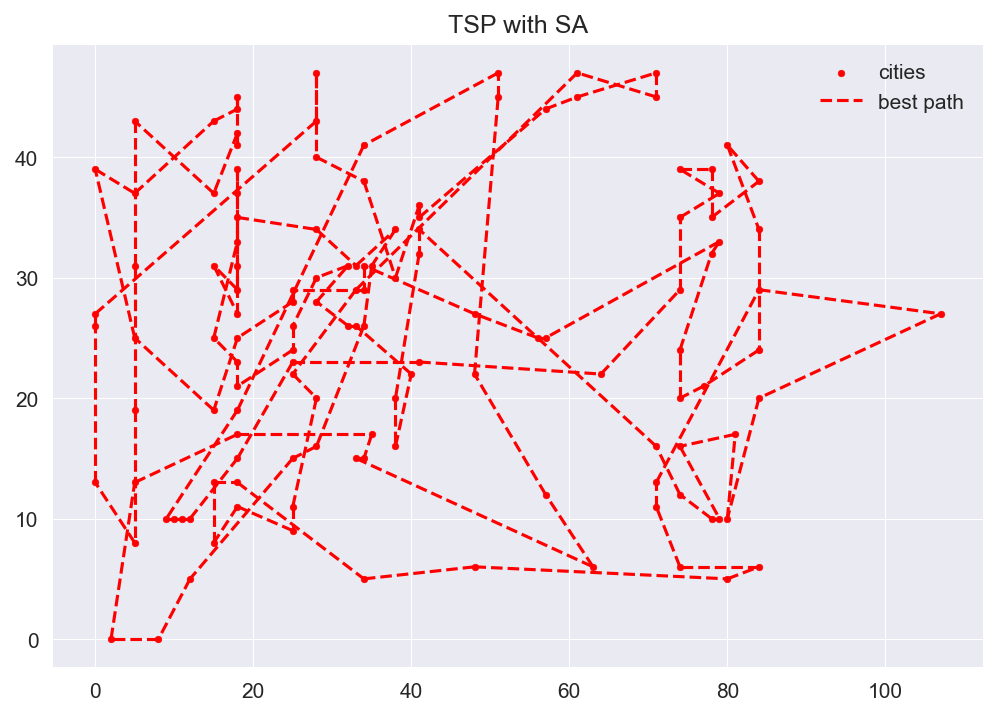

In [6]:
# 模拟退火算法

# 设置算法参数
initial_temperature = 1000
cooling_rate = 0.99
num_iterations = 10000

# 运行200模拟退火算法,每次运行给不同的随机数种子，保留最佳路径和最佳距离
all_best_distance = np.inf
for i in range(200):
    sa = SA(cities, distance, initial_temperature, cooling_rate, num_iterations)
    sa.set_seed(i)
    best_path, best_distance = sa.simulated_annealing()
    if best_distance < all_best_distance:
        all_best_path = best_path
        all_best_distance = best_distance
        best_modelSA = sa


# 输出结果
print("最佳路径：", all_best_path)
print("最佳距离：", all_best_distance)

best_modelSA.plot_learning_curve()
plot_result(cities, all_best_path,model_name='SA', names=False, s=10)

最佳路径： [82, 83, 84, 85, 79, 71, 72, 58, 59, 60, 43, 42, 41, 40, 39, 38, 37, 36, 35, 34, 33, 32, 31, 30, 29, 28, 27, 26, 25, 18, 16, 15, 14, 13, 11, 5, 0, 6, 7, 1, 2, 8, 9, 3, 10, 23, 22, 21, 20, 19, 4, 12, 17, 24, 52, 44, 45, 53, 54, 46, 47, 48, 49, 50, 51, 55, 56, 57, 62, 65, 69, 68, 64, 61, 78, 75, 70, 66, 81, 80, 77, 76, 74, 67, 63, 73, 88, 92, 97, 111, 122, 129, 120, 117, 113, 104, 99, 100, 101, 105, 106, 112, 107, 108, 114, 118, 115, 119, 116, 121, 128, 127, 126, 125, 124, 123, 130, 109, 110, 102, 103, 96, 95, 94, 89, 90, 98, 93, 91, 87, 86]
最佳距离： 619.6321037513053


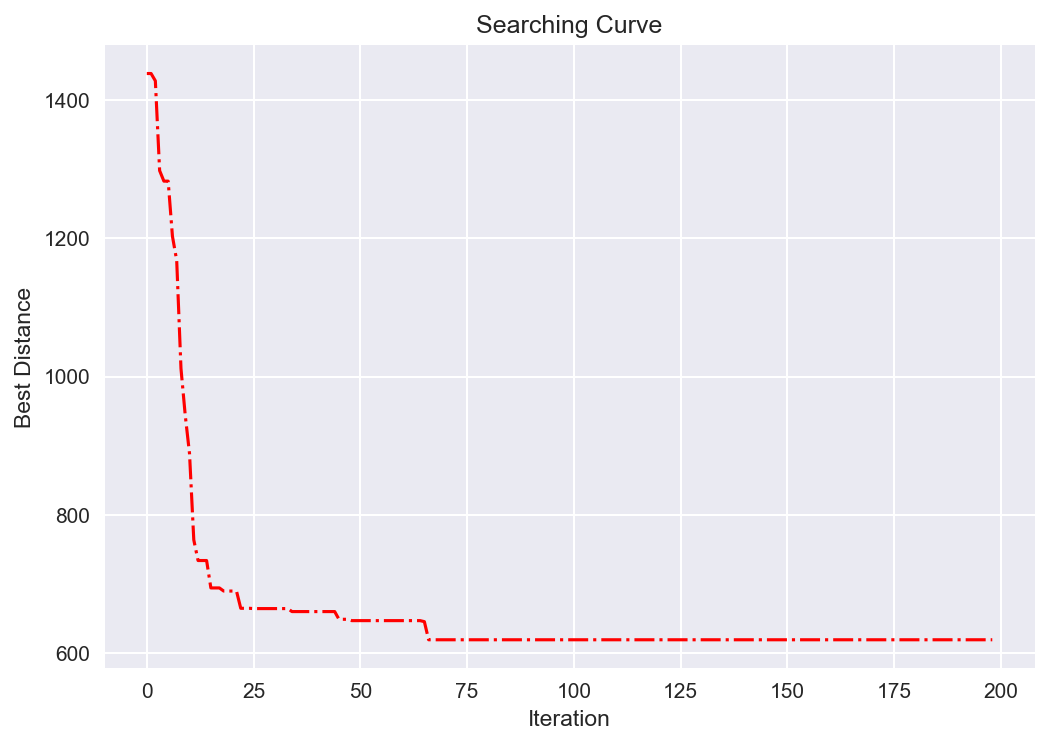

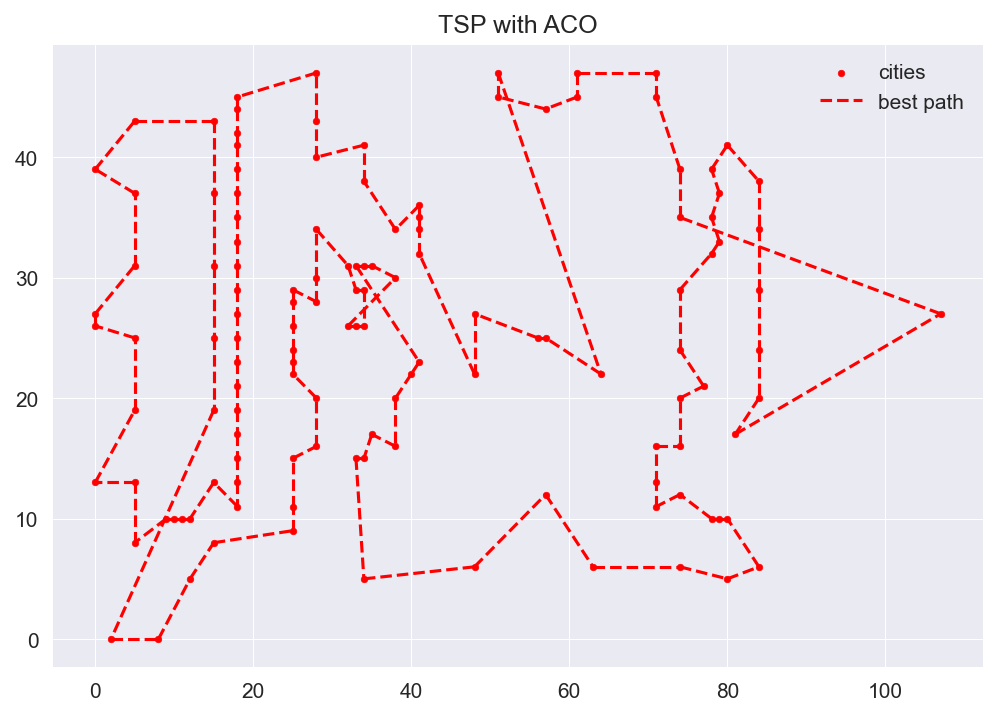

In [5]:
# 蚁群算法
city_num = len(cities)
modelACO = ACO(city_num, distance, ant_num = 50, alpha = 1.0, beta = 2.0, rho = 0.5, Q = 1, iter_max = 200)
modelACO.set_seed(0)
best_path, best_distance = modelACO.ant_colony_algorithm()

# 输出结果
print("最佳路径：", best_path)
print("最佳距离：", best_distance)

modelACO.plot_learning_curve()
plot_result(cities, best_path,model_name='ACO', names=False, s=10)

最佳路径： [58, 59, 60, 57, 56, 55, 49, 48, 47, 46, 54, 63, 67, 74, 76, 77, 68, 64, 61, 69, 65, 62, 66, 70, 75, 78, 79, 71, 72, 90, 96, 95, 94, 89, 85, 84, 83, 82, 81, 80, 86, 87, 91, 93, 98, 109, 115, 119, 116, 110, 102, 103, 121, 128, 127, 118, 114, 108, 107, 106, 112, 123, 124, 125, 126, 130, 129, 122, 120, 117, 113, 111, 104, 105, 101, 100, 99, 97, 92, 88, 73, 52, 44, 25, 24, 17, 12, 4, 11, 0, 5, 13, 14, 15, 16, 18, 26, 27, 28, 19, 6, 1, 2, 7, 8, 9, 3, 10, 23, 43, 42, 41, 40, 39, 38, 22, 36, 21, 35, 51, 50, 34, 33, 20, 32, 31, 30, 29, 45, 53, 37]
最佳距离： 661.292119317796


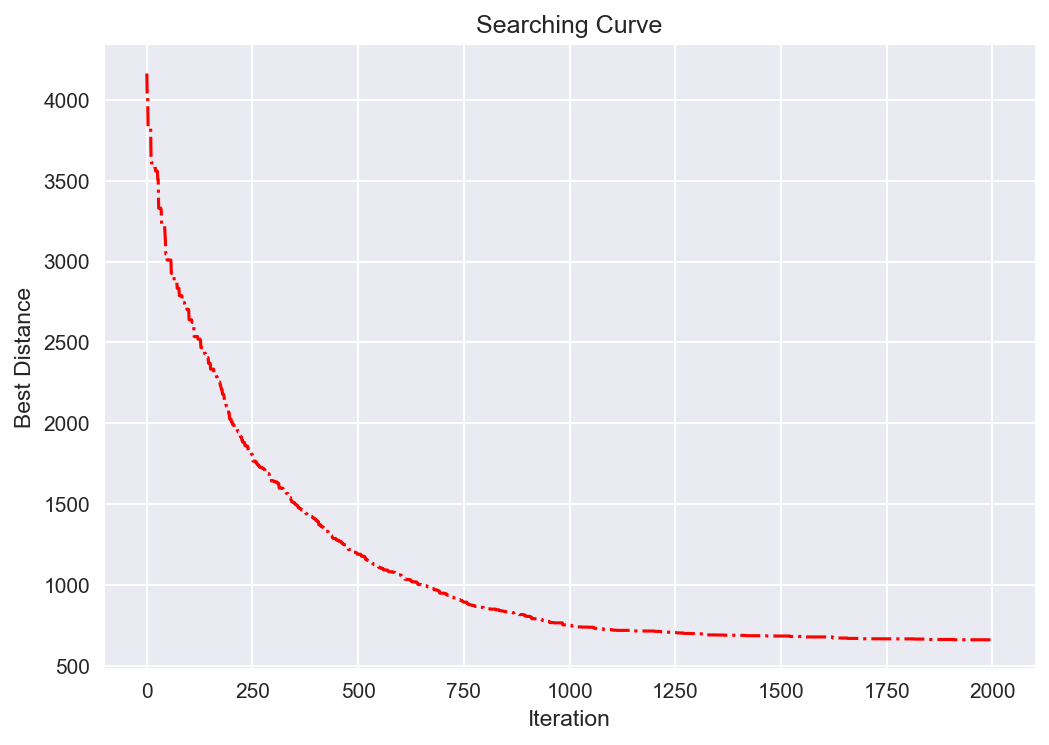

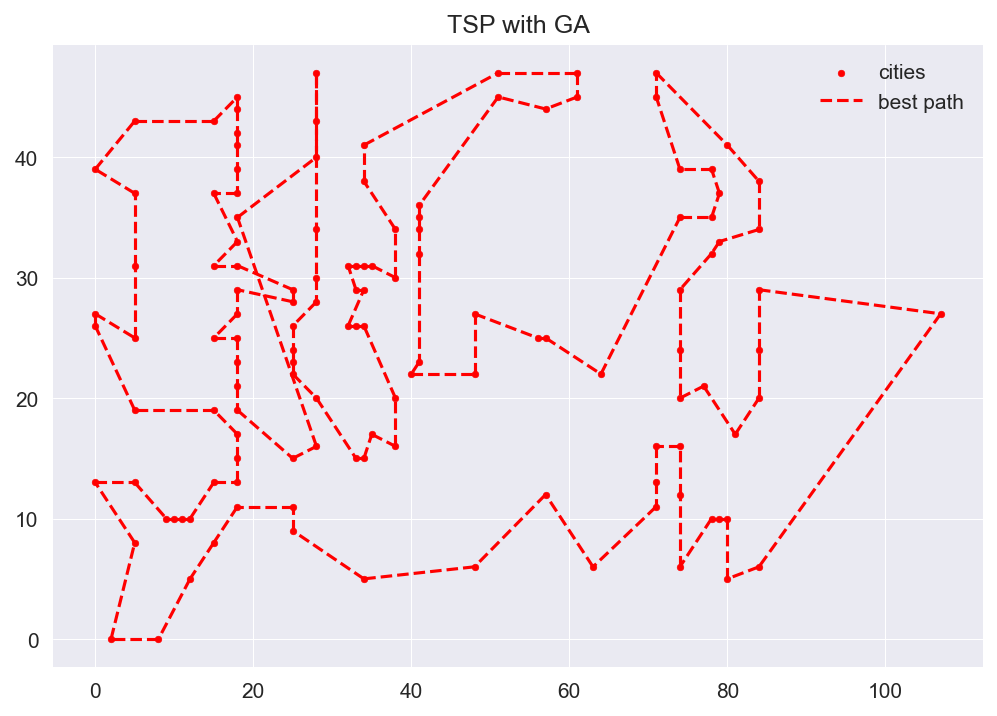

In [6]:
# 遗传算法

# 设置算法参数
pop_size = 200
pc = 0.8
pm = 0.1
iter_max = 2000

modelGA = GA(cities, distance, pop_size, pc, pm, iter_max)
modelGA.set_seed(0)
best_path, best_distance = modelGA.genetic_algorithm()

# 输出结果
print("最佳路径：", best_path)
print("最佳距离：", best_distance)

modelGA.plot_learning_curve()
plot_result(cities, best_path,model_name='GA', names=False, s=10)

In [7]:
# 生成动图
# generate_gif(cities, modelACO.best_path_list[:100], model_name='ACO_xqf131', fps=5, names=False, s=10)
# generate_gif(cities, modelGA.best_path_list[:1000], model_name='GA_xqf131', fps=80, names=False, s=10)